In [3]:
import pandas as pd
!pip install pyarrow
df = pd.read_parquet('train-00000-of-00001-a5a7c6e4bb30b016.parquet')
# df.head(10)

In [4]:
df.head()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...


In [5]:
df.shape

(1000, 11)

In [6]:

# prompt: Provide a summary of each column (data types, unique values, missing values, etc.).

# Assuming 'df' is already loaded as in the previous code
# df = pd.read_csv("customer_support_tickets.csv")

for col in df.columns:
    print(f"Column: {col}")
    print(f"Data Type: {df[col].dtype}")
    print(f"Unique Values: {df[col].nunique()}")
    print(f"Missing Values: {df[col].isnull().sum()}")
    print(f"First 5 Unique Values: {df[col].unique()[:5]}") # Show first 5 unique values
    print("---")

Column: issue_area
Data Type: object
Unique Values: 6
Missing Values: 0
First 5 Unique Values: ['Login and Account' 'Cancellations and returns' 'Order' 'Shopping'
 'Warranty']
---
Column: issue_category
Data Type: object
Unique Values: 40
Missing Values: 0
First 5 Unique Values: ['Mobile Number and Email Verification' 'Pickup and Shipping'
 'Replacement and Return Process' 'Login Issues and Error Messages'
 'Order Delivery Issues']
---
Column: issue_sub_category
Data Type: object
Unique Values: 109
Missing Values: 0
First 5 Unique Values: ['Verification requirement for mobile number or email address during login'
 'Reasons for being asked to ship the item'
 "Inability to click the 'Cancel' button"
 'Error message regarding exceeded attempts to enter the correct verification code'
 'Delivery not attempted again']
---
Column: issue_category_sub_category
Data Type: object
Unique Values: 109
Missing Values: 0
First 5 Unique Values: ['Mobile Number and Email Verification -> Verification req

In [7]:

# prompt: count of all the unique values of each columns along with their unique valuse

# Assuming 'df' is already loaded as in the previous code
# ... (your existing code)

for col in df.columns:
    print(f"Column: {col}")
    print(f"Unique Value Counts:\n{df[col].value_counts()}")
    print("---")

Column: issue_area
Unique Value Counts:
issue_area
Cancellations and returns    286
Order                        270
Login and Account            151
Shopping                     116
Warranty                     105
Shipping                      72
Name: count, dtype: int64
---
Column: issue_category
Unique Value Counts:
issue_category
Return and Exchange                                        95
Order Delivery Issues                                      91
Pickup and Shipping                                        66
Mobile Number and Email Verification                       59
Replacement and Return Process                             58
Returns and Refunds                                        37
Invoice and Payment                                        36
Pricing and Discounts                                      36
Order Confirmation and Status                              35
Lost or Missing Warranty Card                              32
Cash on Delivery (CoD) Refunds            

In [8]:
# prompt: Analyze frequency distributions for categorical columns.

# Assuming 'df' is already loaded as in the previous code.

# Analyze frequency distributions for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category'])

for col in categorical_cols:
    print(f"Frequency distribution for '{col}':")
    print(df[col].value_counts(normalize=True) * 100)  # Display percentages
    print("-" * 30)


Frequency distribution for 'issue_area':
issue_area
Cancellations and returns    28.6
Order                        27.0
Login and Account            15.1
Shopping                     11.6
Warranty                     10.5
Shipping                      7.2
Name: proportion, dtype: float64
------------------------------
Frequency distribution for 'issue_category':
issue_category
Return and Exchange                                        9.5
Order Delivery Issues                                      9.1
Pickup and Shipping                                        6.6
Mobile Number and Email Verification                       5.9
Replacement and Return Process                             5.8
Returns and Refunds                                        3.7
Invoice and Payment                                        3.6
Pricing and Discounts                                      3.6
Order Confirmation and Status                              3.5
Lost or Missing Warranty Card                        

In [9]:
# prompt: Analyze frequency distributions for categorical columns and give the maximum frequency distribution for each column

# Assuming 'df' is already loaded as in the previous code.

# Analyze frequency distributions for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category'])

for col in categorical_cols:
    print(f"Maximum frequency distribution for '{col}':")
    max_freq = df[col].value_counts().max()
    print(max_freq)
    print("-" * 30)

Maximum frequency distribution for 'issue_area':
286
------------------------------
Maximum frequency distribution for 'issue_category':
95
------------------------------
Maximum frequency distribution for 'issue_sub_category':
17
------------------------------
Maximum frequency distribution for 'issue_category_sub_category':
17
------------------------------
Maximum frequency distribution for 'customer_sentiment':
552
------------------------------
Maximum frequency distribution for 'product_category':
465
------------------------------
Maximum frequency distribution for 'product_sub_category':
28
------------------------------
Maximum frequency distribution for 'issue_complexity':
488
------------------------------
Maximum frequency distribution for 'agent_experience_level':
507
------------------------------
Maximum frequency distribution for 'agent_experience_level_desc':
507
------------------------------
Maximum frequency distribution for 'conversation':
3
-----------------------

In [10]:
# prompt: Count the occurrences of each sentiment category (e.g., neutral, negative, frustrated).

# Assuming 'df' is already loaded and contains a column named 'Sentiment'
# Replace 'Sentiment' with the actual column name if different

sentiment_counts = df['customer_sentiment'].value_counts()
sentiment_counts

,count
customer_sentiment,
neutral,552
negative,316
frustrated,105
positive,27


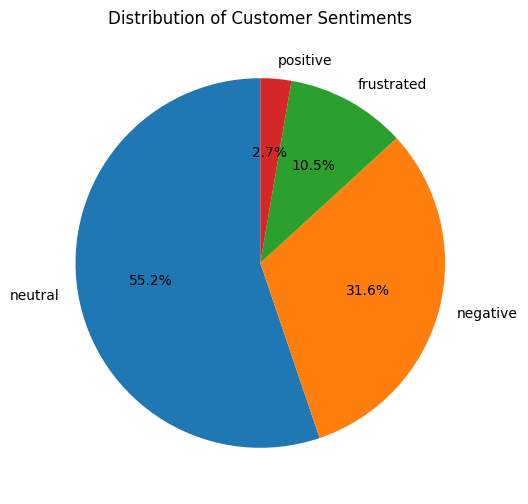

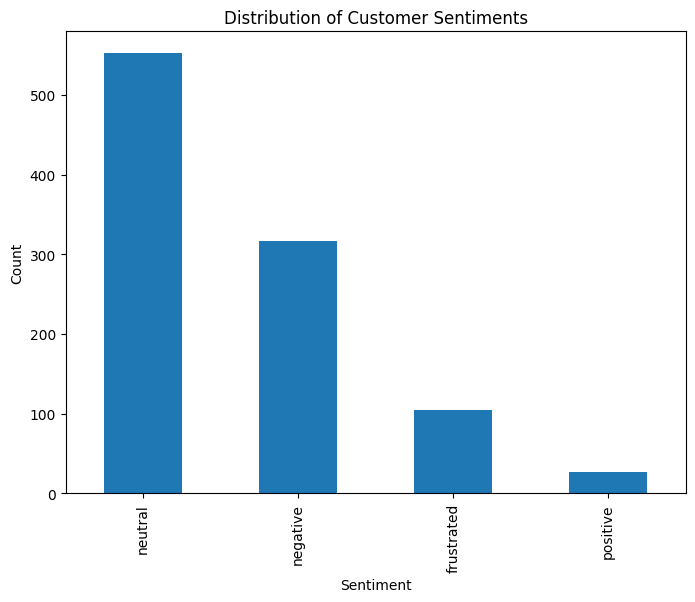

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Sentiments')
plt.ylabel('')  # Hide the y-axis label
plt.show()


plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Distribution of Customer Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



In [12]:
sentiment_proportions = df.groupby('issue_area')['customer_sentiment'].value_counts(normalize=True)

# Print the result
print(sentiment_proportions)



issue_area                 customer_sentiment
Cancellations and returns  neutral               0.503497
                           negative              0.349650
                           frustrated            0.146853
Login and Account          neutral               0.807947
                           negative              0.192053
Order                      negative              0.440741
                           neutral               0.318519
                           frustrated            0.140741
                           positive              0.100000
Shipping                   negative              0.527778
                           neutral               0.472222
Shopping                   neutral               0.681034
                           negative              0.189655
                           frustrated            0.129310
Warranty                   neutral               0.828571
                           frustrated            0.095238
                          

In [13]:
crosstab = pd.crosstab(df['issue_area'], df['product_category'])
print(crosstab)

product_category           Appliances  Electronics  Men/Women/Kids
issue_area                                                        
Cancellations and returns         136           88              62
Login and Account                  65           44              42
Order                             107           79              84
Shipping                           35           22              15
Shopping                           52           35              29
Warranty                           70           35               0


In [14]:
negative_sentiment_counts = df[df['customer_sentiment'] == 'negative'].groupby(['issue_category', 'issue_sub_category'])['customer_sentiment'].count()

# Sort the counts in descending order to find the most frequent negative sentiment combinations
negative_sentiment_counts_sorted = negative_sentiment_counts.sort_values(ascending=False)

# Print or further analyze the sorted counts
negative_sentiment_counts_sorted


,,customer_sentiment
issue_category,issue_sub_category,
Mobile Number and Email Verification,Issues with receiving the OTP or verification code,15
Account Reactivation and Deactivation,Reactivating an inactive account,14
Returns and Refunds,Service center denial of repair request,14
Pickup and Shipping,Changing the address for item pick-up,14
Product Availability for Shipping,"Inability to order specific products (e.g., television, air-conditioner, refrigerator, washing machine, furniture, microwave, treadmill) at a location",13
Availability of Faster Delivery Options,Unavailability of faster delivery options at a specific location,12
Return and Exchange,Package open or tampered on delivery,12
Return Checks and Fees,Determination of the Return Fee,12
Order Delivery Issues,Delivery not attempted again,11


In [15]:


import pandas as pd
import matplotlib.pyplot as plt

sentiment_by_issue = df.groupby('issue_area')['customer_sentiment'].value_counts(normalize=True).unstack()

# Sort the resulting DataFrame by the 'negative' column in descending order
sentiment_by_issue_sorted = sentiment_by_issue.sort_values('negative', ascending=False)

# Display or further process the sorted results
print(sentiment_by_issue_sorted)


# Calculate the percentage of negative sentiments for each issue area
negative_percentage = df[df['customer_sentiment'] == 'negative'].groupby('issue_area').size() / df.groupby('issue_area').size() * 100

# Print the result
negative_percentage

customer_sentiment         frustrated  negative   neutral  positive
issue_area                                                         
Shipping                          NaN  0.527778  0.472222       NaN
Order                        0.140741  0.440741  0.318519       0.1
Cancellations and returns    0.146853  0.349650  0.503497       NaN
Login and Account                 NaN  0.192053  0.807947       NaN
Shopping                     0.129310  0.189655  0.681034       NaN
Warranty                     0.095238  0.076190  0.828571       NaN


,0
issue_area,
Cancellations and returns,34.965035
Login and Account,19.205298
Order,44.074074
Shipping,52.777778
Shopping,18.965517
Warranty,7.619048


In [16]:


!pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming 'df' is your DataFrame with 'text' and 'customer_sentiment' columns.
# Replace 'text' and 'customer_sentiment' with the correct column names if necessary.

# Sample 100 datapoints for demonstration.
df_sample = df.sample(n=100, random_state=42) # Set random_state for reproducibility

# Preprocessing: handle missing values in the text column (if any).
df_sample['issue_category'] = df_sample['issue_category'].fillna('')

X = df_sample['issue_category']
y = df_sample['customer_sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80/20 split

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression model (or any other suitable model)
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  frustrated       0.00      0.00      0.00         3
    negative       0.00      0.00      0.00         7
     neutral       0.38      0.67      0.48         9
    positive       0.00      0.00      0.00         1

    accuracy                           0.30        20
   macro avg       0.09      0.17      0.12        20
weighted avg       0.17      0.30      0.22        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# prompt:  1. Get baseline F1 socre with no prompt engineering, 2. Get F1 with prompt engineering, 3. Get F1 with Prompt Engineering + Examples

from sklearn.metrics import f1_score

# Baseline F1 score (already calculated in the previous code)
# The previous code already calculates and prints the classification report,
# which includes the F1-score.  We'll extract it here for clarity.

y_pred = model.predict(X_test_vec)
baseline_f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
print(f"Baseline F1 Score: {baseline_f1}")


# --- Prompt Engineering ---
# Example: Add a prefix to the input text to guide the model.

def enhance_text_with_prompt(text):
    return f"Classify the customer sentiment for the following text: {text}"

X_train_enhanced = [enhance_text_with_prompt(text) for text in X_train]
X_test_enhanced = [enhance_text_with_prompt(text) for text in X_test]

X_train_vec_enhanced = vectorizer.fit_transform(X_train_enhanced)
X_test_vec_enhanced = vectorizer.transform(X_test_enhanced)

model_enhanced = LogisticRegression()
model_enhanced.fit(X_train_vec_enhanced, y_train)

y_pred_enhanced = model_enhanced.predict(X_test_vec_enhanced)
f1_enhanced = f1_score(y_test, y_pred_enhanced, average='weighted')
print(f"F1 Score with Prompt Engineering: {f1_enhanced}")



# --- Prompt Engineering + Examples ---
# Construct a few example pairs for few-shot learning.

examples = [
    ("This is a problem.", "negative"),
    ("I am very happy", "positive"),
    ("This is ok", "neutral")
]

def enhance_text_with_examples(text):
    example_str = "\n".join(f"Text: {ex[0]}, Sentiment: {ex[1]}" for ex in examples)
    return f"{example_str}\nText: {text}, Sentiment:"


X_train_examples = [enhance_text_with_examples(text) for text in X_train]
X_test_examples = [enhance_text_with_examples(text) for text in X_test]


vectorizer_examples = TfidfVectorizer()
X_train_vec_examples = vectorizer_examples.fit_transform(X_train_examples)
X_test_vec_examples = vectorizer_examples.transform(X_test_examples)

model_examples = LogisticRegression()
model_examples.fit(X_train_vec_examples, y_train)

y_pred_examples = model_examples.predict(X_test_vec_examples)
f1_examples = f1_score(y_test, y_pred_examples, average='weighted')
print(f"F1 Score with Prompt Engineering + Examples: {f1_examples}")

Baseline F1 Score: 0.21600000000000003
F1 Score with Prompt Engineering: 0.21600000000000003
F1 Score with Prompt Engineering + Examples: 0.2571428571428571


In [23]:


# Sample 100 datapoints for demonstration.  Adjust n as needed.
df_sample = df.sample(n=1000, random_state=42) # Set random_state for reproducibility

# Preprocessing: handle missing values in the text column (if any).
df_sample['issue_category'] = df_sample['issue_category'].fillna('')

X = df_sample['issue_category']
y = df_sample['customer_sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80/20 split

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression model (or any other suitable model)
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model using classification report
print(classification_report(y_test, y_pred))

# Baseline F1 score
baseline_f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
print(f"Baseline F1 Score: {baseline_f1}")


# --- Prompt Engineering ---
def enhance_text_with_prompt(text):
    return f"Classify the customer sentiment: {text}"

X_train_enhanced = [enhance_text_with_prompt(text) for text in X_train]
X_test_enhanced = [enhance_text_with_prompt(text) for text in X_test]

X_train_vec_enhanced = vectorizer.fit_transform(X_train_enhanced)
X_test_vec_enhanced = vectorizer.transform(X_test_enhanced)

model_enhanced = LogisticRegression()
model_enhanced.fit(X_train_vec_enhanced, y_train)
y_pred_enhanced = model_enhanced.predict(X_test_vec_enhanced)
f1_enhanced = f1_score(y_test, y_pred_enhanced, average='weighted')
print(f"F1 Score with Prompt Engineering: {f1_enhanced}")


# --- Prompt Engineering + Examples ---
examples = [
    ("The product is defective.", "negative"),
    ("I love this service!", "positive"),
    ("It's okay.", "neutral")
]

def enhance_text_with_examples(text):
    example_str = "\n".join([f"Text: {ex[0]}, Sentiment: {ex[1]}" for ex in examples])
    return f"{example_str}\nText: {text}, Sentiment:"

X_train_examples = [enhance_text_with_examples(text) for text in X_train]
X_test_examples = [enhance_text_with_examples(text) for text in X_test]

vectorizer_examples = TfidfVectorizer()
X_train_vec_examples = vectorizer_examples.fit_transform(X_train_examples)
X_test_vec_examples = vectorizer_examples.transform(X_test_examples)

model_examples = LogisticRegression()
model_examples.fit(X_train_vec_examples, y_train)
y_pred_examples = model_examples.predict(X_test_vec_examples)
f1_examples = f1_score(y_test, y_pred_examples, average='weighted')
print(f"F1 Score with Prompt Engineering + Examples: {f1_examples}")

              precision    recall  f1-score   support

  frustrated       0.00      0.00      0.00        18
    negative       0.62      0.55      0.58        69
     neutral       0.68      0.87      0.76       108
    positive       0.00      0.00      0.00         5

    accuracy                           0.66       200
   macro avg       0.32      0.36      0.34       200
weighted avg       0.58      0.66      0.61       200

Baseline F1 Score: 0.6127044534412955
F1 Score with Prompt Engineering: 0.6127044534412955
F1 Score with Prompt Engineering + Examples: 0.6127044534412955


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:

def enhance_text_with_prompt(text):
    return f"Classify the customer sentiment: {text}"

X_train_enhanced = [enhance_text_with_prompt(text) for text in X_train]
X_test_enhanced = [enhance_text_with_prompt(text) for text in X_test]

X_train_vec_enhanced = vectorizer.fit_transform(X_train_enhanced)
X_test_vec_enhanced = vectorizer.transform(X_test_enhanced)

model_enhanced = LogisticRegression()
model_enhanced.fit(X_train_vec_enhanced, y_train)
y_pred_enhanced = model_enhanced.predict(X_test_vec_enhanced)
f1_enhanced = f1_score(y_test, y_pred_enhanced, average='weighted')
print(f"F1 Score with Prompt Engineering: {f1_enhanced}")


# --- Prompt Engineering + Examples ---
examples = [
    ("The product is defective.", "negative"),
    ("I love this service!", "positive"),
    ("It's okay.", "neutral")
]

def enhance_text_with_examples(text):
    example_str = "\n".join([f"Text: {ex[0]}, Sentiment: {ex[1]}" for ex in examples])
    return f"{example_str}\nText: {text}, Sentiment:"

X_train_examples = [enhance_text_with_examples(text) for text in X_train]
X_test_examples = [enhance_text_with_examples(text) for text in X_test]

vectorizer_examples = TfidfVectorizer()
X_train_vec_examples = vectorizer_examples.fit_transform(X_train_examples)
X_test_vec_examples = vectorizer_examples.transform(X_test_examples)

model_examples = LogisticRegression()
model_examples.fit(X_train_vec_examples, y_train)
y_pred_examples = model_examples.predict(X_test_vec_examples)
f1_examples = f1_score(y_test, y_pred_examples, average='weighted')
print(f"F1 Score with Prompt Engineering + Examples: {f1_examples}")

F1 Score with Prompt Engineering: 0.6127044534412955
F1 Score with Prompt Engineering + Examples: 0.6127044534412955


In [28]:

def enhance_text_with_prompt(text):
    return f"Classify the customer sentiment: {text}"

X_train_enhanced = [enhance_text_with_prompt(text) for text in X_train]
X_test_enhanced = [enhance_text_with_prompt(text) for text in X_test]

X_train_vec_enhanced = vectorizer.fit_transform(X_train_enhanced)
X_test_vec_enhanced = vectorizer.transform(X_test_enhanced)

model_enhanced = LogisticRegression()
model_enhanced.fit(X_train_vec_enhanced, y_train)
y_pred_enhanced = model_enhanced.predict(X_test_vec_enhanced)
f1_enhanced = f1_score(y_test, y_pred_enhanced, average='weighted')
print(f"F1 Score with Prompt Engineering: {f1_enhanced}")


# --- Prompt Engineering + Examples ---
examples = [
    ("The product is defective.", "negative"),
    ("I love this service!", "positive"),
    ("It's okay.", "neutral")
]

def enhance_text_with_examples(text):
    example_str = "\n".join([f"Text: {ex[0]}, Sentiment: {ex[1]}" for ex in examples])
    return f"{example_str}\nText: {text}, Sentiment:"

X_train_examples = [enhance_text_with_examples(text) for text in X_train]
X_test_examples = [enhance_text_with_examples(text) for text in X_test]

vectorizer_examples = TfidfVectorizer()
X_train_vec_examples = vectorizer_examples.fit_transform(X_train_examples)
X_test_vec_examples = vectorizer_examples.transform(X_test_examples)

model_examples = LogisticRegression()
model_examples.fit(X_train_vec_examples, y_train)
y_pred_examples = model_examples.predict(X_test_vec_examples)
f1_examples = f1_score(y_test, y_pred_examples, average='weighted')
print(f"F1 Score with Prompt Engineering + Examples: {f1_examples}")

F1 Score with Prompt Engineering: 0.6127044534412955
F1 Score with Prompt Engineering + Examples: 0.6127044534412955


In [19]:
# prompt: Response: Categories, product names and issues finalized with their % coverage in dataset.

# Assuming 'df' is already loaded and processed as in the previous code.

# Group by 'issue_area' and count occurrences of each 'customer_sentiment'
sentiment_by_issue = df.groupby('issue_area')['customer_sentiment'].value_counts()

# Calculate the percentage of each sentiment within each issue area
sentiment_percentage = sentiment_by_issue.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Print the results
sentiment_percentage

issue_area                 issue_area                 customer_sentiment
Cancellations and returns  Cancellations and returns  neutral               50.349650
                                                      negative              34.965035
                                                      frustrated            14.685315
Login and Account          Login and Account          neutral               80.794702
                                                      negative              19.205298
Order                      Order                      negative              44.074074
                                                      neutral               31.851852
                                                      frustrated            14.074074
                                                      positive              10.000000
Shipping                   Shipping                   negative              52.777778
                                                      neutral               47.222222
Shopping                   Shopping                   neutral               68.103448
                                                      negative              18.965517
                                                      frustrated            12.931034
Warranty                   Warranty                   neutral               82.857143
                                                      frustrated             9.523810
                                                      negative               7.619048
Name: count, dtype: float64

In [20]:
# prompt: Response: Templates finalized for the product names and issues.

# Assuming 'df' is already loaded and processed as in the previous code.

# Group by 'issue_area' and 'product_category', then count occurrences of each 'customer_sentiment'
sentiment_by_issue_product = df.groupby(['issue_area', 'product_category'])['customer_sentiment'].value_counts()

# Calculate the percentage of each sentiment within each issue area and product category
sentiment_percentage_by_product = sentiment_by_issue_product.groupby(level=[0, 1]).apply(lambda x: 100 * x / float(x.sum()))

# Print the results
sentiment_percentage_by_product

issue_area                 product_category  issue_area                 product_category  customer_sentiment
Cancellations and returns  Appliances        Cancellations and returns  Appliances        neutral               49.264706
                                                                                          negative              34.558824
                                                                                          frustrated            16.176471
                           Electronics       Cancellations and returns  Electronics       neutral               51.136364
                                                                                          negative              32.954545
                                                                                          frustrated            15.909091
                           Men/Women/Kids    Cancellations and returns  Men/Women/Kids    neutral               51.612903
                                                                                          negative              38.709677
                                                                                          frustrated             9.677419
Login and Account          Appliances        Login and Account          Appliances        neutral               80.000000
                                                                                          negative              20.000000
                           Electronics       Login and Account          Electronics       neutral               77.272727
                                                                                          negative              22.727273
                           Men/Women/Kids    Login and Account          Men/Women/Kids    neutral               85.714286
                                                                                          negative              14.285714
Order                      Appliances        Order                      Appliances        negative              46.728972
                                                                                          neutral               27.102804
                                                                                          frustrated            14.953271
                                                                                          positive              11.214953
                           Electronics       Order                      Electronics       negative              46.835443
                                                                                          neutral               36.708861
                                                                                          frustrated             8.860759
                                                                                          positive               7.594937
                           Men/Women/Kids    Order                      Men/Women/Kids    negative              38.095238
                                                                                          neutral               33.333333
                                                                                          frustrated            17.857143
                                                                                          positive              10.714286
Shipping                   Appliances        Shipping                   Appliances        negative              51.428571
                                                                                          neutral               48.571429
                           Electronics       Shipping                   Electronics       neutral               54.545455
                                                                                          negative              45.454545
                           Men/Women/Kids    Shipping                   Men/Women/Kids    negative           

In [21]:

# Calculate the average sentiment for each issue area
average_sentiment = df.groupby('issue_area')['customer_sentiment'].value_counts(normalize=True)

# Print the results
average_sentiment

issue_area                 customer_sentiment
Cancellations and returns  neutral               0.503497
                           negative              0.349650
                           frustrated            0.146853
Login and Account          neutral               0.807947
                           negative              0.192053
Order                      negative              0.440741
                           neutral               0.318519
                           frustrated            0.140741
                           positive              0.100000
Shipping                   negative              0.527778
                           neutral               0.472222
Shopping                   neutral               0.681034
                           negative              0.189655
                           frustrated            0.129310
Warranty                   neutral               0.828571
                           frustrated            0.095238
                           negative              0.076190
Name: proportion, dtype: float64